In [1]:
import pandas as pd
import numpy as np
import itertools

In [2]:
from typing import Generator

In [3]:
c = itertools.count(10, 10)

In [4]:
df = pd.DataFrame({
    'a': [1, 2, 3, 4],
    'b': range(4),
    'c': iter('abdc'),
    'd': (x for _, x in zip(range(4), c)),
    'e': (x for _, x in zip(range(4), itertools.cycle('ABC'))),
})

In [5]:
df

,a,b,c,d,e
0,1,0,a,10,A
1,2,1,b,20,B
2,3,2,d,30,C
3,4,3,c,40,A


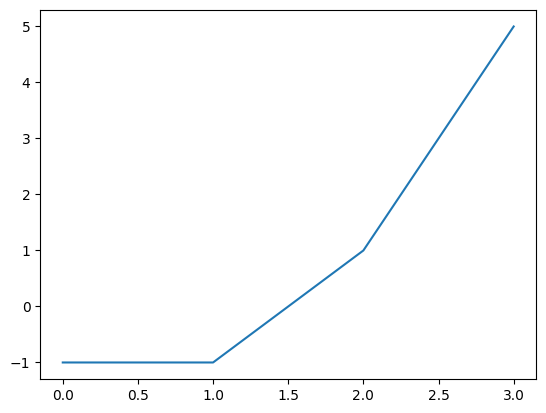

In [6]:
df.assign(
    f=lambda d: d.a + d.b,
    g=lambda d: d.a * d.b,
    h=lambda d: d.g - d.f,
)['h'].plot();

In [7]:
print(df)

   a  b  c   d  e
0  1  0  a  10  A
1  2  1  b  20  B
2  3  2  d  30  C
3  4  3  c  40  A


In [8]:
next(c)

50

In [9]:
df2 = pd.DataFrame(np.random.rand(2000).reshape(1000, -1), columns = ['x', 'y'])

In [10]:
df2.shape

(1000, 2)

In [11]:
df2.head()

,x,y
0,0.787826,0.839019
1,0.030616,0.235700
2,0.982241,0.080019
3,0.046172,0.131130
4,0.760451,0.122259


<Axes: xlabel='x', ylabel='y'>

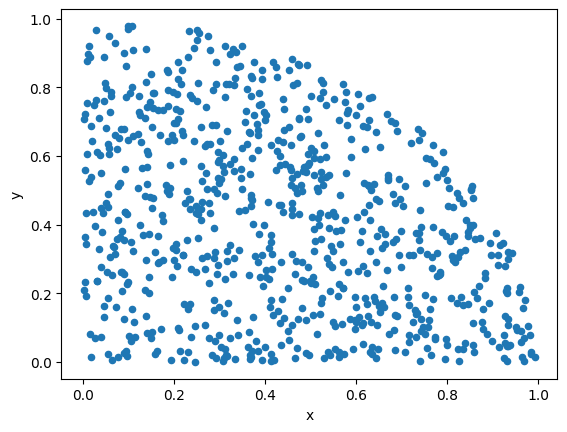

In [12]:
(
    df2.
    loc[lambda d: d['x'] ** 2 + d['y'] ** 2 <= 1].
    plot(kind='scatter', x='x', y='y')
)

In [13]:
import matplotlib.pyplot as plt 

In [14]:
df2_1 = (
    df2
    .assign(
        square_dist=lambda d: d['x'] ** 2 + d['y'] ** 2,
        in_circle=lambda d: d.square_dist <= 1,
    )
)

In [15]:
df2_1.head()

,x,y,square_dist,in_circle
0,0.787826,0.839019,1.324624,False
1,0.030616,0.235700,0.056492,True
2,0.982241,0.080019,0.971200,True
3,0.046172,0.131130,0.019327,True
4,0.760451,0.122259,0.593234,True


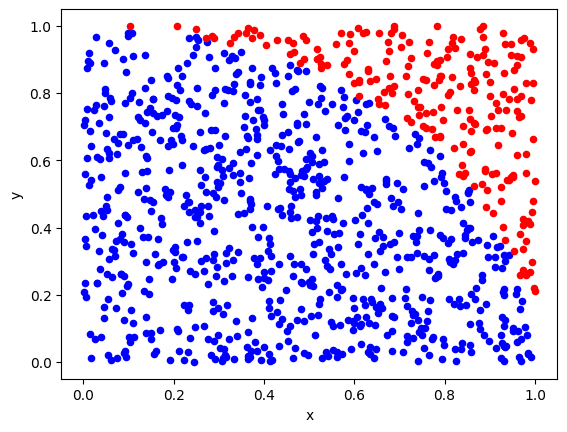

In [16]:
ax = (
    df2_1
    .loc[df2_1.in_circle]
    .plot(kind='scatter', x='x', y='y', color='blue')
)
(
    df2_1
    .loc[~df2_1.in_circle]
    .plot(kind='scatter', x='x', y='y', color='red', ax=ax)
)
plt.show()

In [17]:
(
    df2
    .loc[lambda d: d['x'] ** 2 + d['y'] ** 2 <= 1]
    # plot(kind='scatter', x='x', y='y')
    .shape[0]
)

781

In [18]:
777 / df2.shape[0] * 4

3.108

In [19]:
def all_words() -> Generator[tuple, None, None]:
    for paragraph in range(6):
        for line in range(20):
            for word_ind in range(8):
                word = np.random.choice("hello to you cruel world. What are we eating today?".split())
                yield word, paragraph, line, word_ind 

In [20]:
df3 = pd.DataFrame.from_records(all_words(), columns=['word', 'paragraph', 'line', 'word_ind'])

In [21]:
df3.shape

(960, 4)

In [22]:
df3.head(20)

,word,paragraph,line,word_ind
0,What,0,0,0
1,eating,0,0,1
2,today?,0,0,2
3,What,0,0,3
4,are,0,0,4
5,world.,0,0,5
6,we,0,0,6
7,we,0,0,7
8,hello,0,1,0
9,world.,0,1,1


In [23]:
(
    df3.
    query("word=='you'")
)

,word,paragraph,line,word_ind
16,you,0,2,0
26,you,0,3,2
29,you,0,3,5
51,you,0,6,3
58,you,0,7,2
...,...,...,...,...
925,you,5,15,5
934,you,5,16,6
948,you,5,18,4
950,you,5,18,6


In [24]:
list((
    df3
    .loc[lambda d: d.word == 'you', ['paragraph', 'line', 'word_ind']]
    .to_records(index=False)
))

[(0, 2, 0),
 (0, 3, 2),
 (0, 3, 5),
 (0, 6, 3),
 (0, 7, 2),
 (0, 7, 5),
 (0, 10, 0),
 (0, 10, 5),
 (0, 10, 6),
 (0, 15, 0),
 (0, 15, 4),
 (0, 17, 0),
 (0, 17, 2),
 (0, 17, 4),
 (0, 18, 1),
 (0, 19, 5),
 (1, 0, 2),
 (1, 0, 6),
 (1, 1, 1),
 (1, 1, 2),
 (1, 3, 6),
 (1, 4, 3),
 (1, 5, 3),
 (1, 5, 4),
 (1, 7, 2),
 (1, 8, 6),
 (1, 12, 1),
 (1, 12, 7),
 (1, 13, 1),
 (1, 13, 7),
 (1, 14, 2),
 (1, 14, 4),
 (1, 15, 0),
 (1, 17, 5),
 (1, 17, 6),
 (1, 18, 1),
 (1, 19, 1),
 (1, 19, 6),
 (2, 4, 0),
 (2, 4, 6),
 (2, 7, 4),
 (2, 8, 6),
 (2, 9, 5),
 (2, 10, 2),
 (2, 10, 5),
 (2, 12, 2),
 (2, 14, 0),
 (2, 14, 6),
 (2, 15, 4),
 (2, 19, 0),
 (2, 19, 6),
 (3, 0, 0),
 (3, 1, 1),
 (3, 2, 3),
 (3, 4, 6),
 (3, 5, 1),
 (3, 6, 2),
 (3, 7, 2),
 (3, 7, 5),
 (3, 7, 6),
 (3, 9, 3),
 (3, 10, 4),
 (3, 12, 2),
 (3, 12, 4),
 (3, 14, 0),
 (3, 18, 2),
 (3, 19, 3),
 (4, 0, 6),
 (4, 2, 7),
 (4, 3, 5),
 (4, 5, 5),
 (4, 6, 2),
 (4, 9, 1),
 (4, 9, 4),
 (4, 9, 6),
 (4, 10, 1),
 (4, 12, 1),
 (4, 13, 2),
 (4, 14, 7),
 (4, 16, 3),

In [25]:
list(map(tuple, (
    df3
    .loc[lambda d: d.word == 'you', ['paragraph', 'line', 'word_ind']]
    .to_numpy()
)))

[(0, 2, 0),
 (0, 3, 2),
 (0, 3, 5),
 (0, 6, 3),
 (0, 7, 2),
 (0, 7, 5),
 (0, 10, 0),
 (0, 10, 5),
 (0, 10, 6),
 (0, 15, 0),
 (0, 15, 4),
 (0, 17, 0),
 (0, 17, 2),
 (0, 17, 4),
 (0, 18, 1),
 (0, 19, 5),
 (1, 0, 2),
 (1, 0, 6),
 (1, 1, 1),
 (1, 1, 2),
 (1, 3, 6),
 (1, 4, 3),
 (1, 5, 3),
 (1, 5, 4),
 (1, 7, 2),
 (1, 8, 6),
 (1, 12, 1),
 (1, 12, 7),
 (1, 13, 1),
 (1, 13, 7),
 (1, 14, 2),
 (1, 14, 4),
 (1, 15, 0),
 (1, 17, 5),
 (1, 17, 6),
 (1, 18, 1),
 (1, 19, 1),
 (1, 19, 6),
 (2, 4, 0),
 (2, 4, 6),
 (2, 7, 4),
 (2, 8, 6),
 (2, 9, 5),
 (2, 10, 2),
 (2, 10, 5),
 (2, 12, 2),
 (2, 14, 0),
 (2, 14, 6),
 (2, 15, 4),
 (2, 19, 0),
 (2, 19, 6),
 (3, 0, 0),
 (3, 1, 1),
 (3, 2, 3),
 (3, 4, 6),
 (3, 5, 1),
 (3, 6, 2),
 (3, 7, 2),
 (3, 7, 5),
 (3, 7, 6),
 (3, 9, 3),
 (3, 10, 4),
 (3, 12, 2),
 (3, 12, 4),
 (3, 14, 0),
 (3, 18, 2),
 (3, 19, 3),
 (4, 0, 6),
 (4, 2, 7),
 (4, 3, 5),
 (4, 5, 5),
 (4, 6, 2),
 (4, 9, 1),
 (4, 9, 4),
 (4, 9, 6),
 (4, 10, 1),
 (4, 12, 1),
 (4, 13, 2),
 (4, 14, 7),
 (4, 16, 3),

In [26]:
(
    df3
    # .loc[lambda d: d.word == 'you']
    .assign(
        occurance= list(df3[['paragraph', 'line', 'word_ind']].itertuples(index=False, name=None))
    )
)

,word,paragraph,line,word_ind,occurance
0,What,0,0,0,"(0, 0, 0)"
1,eating,0,0,1,"(0, 0, 1)"
2,today?,0,0,2,"(0, 0, 2)"
3,What,0,0,3,"(0, 0, 3)"
4,are,0,0,4,"(0, 0, 4)"
...,...,...,...,...,...
955,are,5,19,3,"(5, 19, 3)"
956,today?,5,19,4,"(5, 19, 4)"
957,we,5,19,5,"(5, 19, 5)"
958,to,5,19,6,"(5, 19, 6)"


In [27]:
(
    df3
    .assign(
        occurance=lambda d: list(d[['paragraph', 'line', 'word_ind']].itertuples(index=False, name=None))
    )
    .groupby('word')
    .agg(
        occurance=('occurance', list)
    )
)

,occurance
word,
What,"[(0, 0, 0), (0, 0, 3), (0, 1, 4), (0, 6, 0), (..."
are,"[(0, 0, 4), (0, 1, 7), (0, 2, 6), (0, 5, 2), (..."
cruel,"[(0, 3, 4), (0, 4, 2), (0, 4, 3), (0, 7, 3), (..."
eating,"[(0, 0, 1), (0, 2, 1), (0, 2, 7), (0, 3, 1), (..."
hello,"[(0, 1, 0), (0, 1, 5), (0, 2, 2), (0, 5, 6), (..."
to,"[(0, 1, 3), (0, 2, 4), (0, 3, 7), (0, 4, 7), (..."
today?,"[(0, 0, 2), (0, 1, 6), (0, 5, 4), (0, 5, 5), (..."
we,"[(0, 0, 6), (0, 0, 7), (0, 2, 5), (0, 3, 3), (..."
world.,"[(0, 0, 5), (0, 1, 1), (0, 1, 2), (0, 2, 3), (..."


In [28]:
df3.head()

,word,paragraph,line,word_ind
0,What,0,0,0
1,eating,0,0,1
2,today?,0,0,2
3,What,0,0,3
4,are,0,0,4


In [29]:
r = range(3)

In [30]:
next(r)

TypeError: 'range' object is not an iterator

In [31]:
ri = iter(r)

In [32]:
next(ri)

0

In [33]:
while True:
    print(next(ri))

1
2


StopIteration: 

In [34]:
c = itertools.count()

In [35]:
next(c)

0

In [36]:
for x in range(4):
    print(next(c))

1
2
3
4


In [37]:
next(c)

5

In [41]:
s = "abcd"
[*s]

['a', 'b', 'c', 'd']

In [42]:
list(s)

['a', 'b', 'c', 'd']

In [43]:
iter(s)

In [44]:
list(iter(s))

['a', 'b', 'c', 'd']

In [45]:
lst = []
lst.extend(s)

In [46]:
lst

['a', 'b', 'c', 'd']

In [47]:
import seaborn as sns

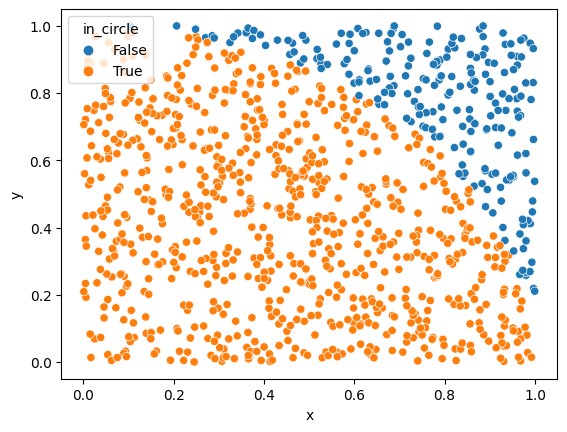

In [50]:
sns.scatterplot(x='x', y='y', data=df2_1, hue='in_circle');

In [110]:
contents = """a,b,msg,last,really_last
1,2,hello,5,1
6,7,bye,,2
1,1,,10,2
,2,haim,11,6
"""

In [111]:
print(contents)

a,b,msg,last,really_last
1,2,hello,5,1
6,7,bye,,2
1,1,,10,2
,2,haim,11,6



In [112]:
from io import StringIO

df4 = pd.read_csv(StringIO(contents))

In [113]:
df4

,a,b,msg,last,really_last
0,1.0,2,hello,5.0,1
1,6.0,7,bye,NaN,2
2,1.0,1,NaN,10.0,2
3,NaN,2,haim,11.0,6


In [114]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3 non-null      float64
 1   b            4 non-null      int64  
 2   msg          3 non-null      object 
 3   last         3 non-null      float64
 4   really_last  4 non-null      int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 288.0+ bytes


In [115]:
pd.isna(df4)

,a,b,msg,last,really_last
0,False,False,False,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,True,False,False,False,False


In [116]:
(
    df4
    .assign(
        a_isna=lambda d: pd.isna(d.a)
    )
    .fillna({'a':-1})
)

,a,b,msg,last,really_last,a_isna
0,1.0,2,hello,5.0,1,False
1,6.0,7,bye,NaN,2,False
2,1.0,1,NaN,10.0,2,False
3,-1.0,2,haim,11.0,6,True


In [117]:
df4.columns

Index(['a', 'b', 'msg', 'last', 'really_last'], dtype='object')

In [118]:
df4

,a,b,msg,last,really_last
0,1.0,2,hello,5.0,1
1,6.0,7,bye,NaN,2
2,1.0,1,NaN,10.0,2
3,NaN,2,haim,11.0,6


In [119]:
df4.memory_usage(deep=True)

Index          128
a               32
b               32
msg            215
last            32
really_last     32
dtype: int64

In [121]:
df4.memory_usage(deep=True).sum()

471

In [129]:
(
    df3
    .memory_usage(deep=True)
    .sum()
)

112645

In [132]:
(
    df3
    .astype({'word': 'category'})
    .memory_usage(deep=True)
    .sum()
)

25360

In [137]:
def f1(df, par1):
    return (
        df
        .assign(
            par1=par1
        )
    )

(
    df3
    .groupby('word', group_keys=False)
    .apply(f1, 4)
)

,word,paragraph,line,word_ind,par1
0,What,0,0,0,4
1,eating,0,0,1,4
2,today?,0,0,2,4
3,What,0,0,3,4
4,are,0,0,4,4
...,...,...,...,...,...
955,are,5,19,3,4
956,today?,5,19,4,4
957,we,5,19,5,4
958,to,5,19,6,4


In [146]:
(
    df3
    .assign(
        eos=lambda d: d.word.str.endswith('?') | d.word.str.endswith('.')
    )
    ['eos']
    .value_counts()
)

False    765
True     195
Name: eos, dtype: int64

In [220]:
from typing import Iterator
import itertools
import collections

In [192]:
def spiral_mat(rows: int, cols: int, content: Iterator) -> "np.array":
    def helper_function(mat : np.array, content: Iterator):
        """recursive function"""
        num_rows, num_cols = mat.shape

        if num_rows < 1 or num_cols < 1:
            return
        mat[0, :] = list(itertools.islice(content, num_cols))
        mat[1:, -1] = [x for _, x in zip(range(num_rows - 1), content)]
        mat[-1, :-1] = list(reversed([x for _, x, in zip(range(num_cols - 1), content)]))
        mat[1:-1, 0] = list(reversed([x for _, x in zip(range(num_rows - 2), content)]))
        helper_function(mat[1:-1, 1:-1], content)

    mat = np.empty((rows, cols))
    helper_function(mat, content)
    return mat

In [193]:
spiral_mat(8, 6, itertools.count())

array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [23., 24., 25., 26., 27.,  6.],
       [22., 39., 40., 41., 28.,  7.],
       [21., 38., 47., 42., 29.,  8.],
       [20., 37., 46., 43., 30.,  9.],
       [19., 36., 45., 44., 31., 10.],
       [18., 35., 34., 33., 32., 11.],
       [17., 16., 15., 14., 13., 12.]])

In [194]:
c

count(34)

In [195]:
list(itertools.islice(c, 10))

[34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

In [196]:
list(itertools.islice(c, 10))

[44, 45, 46, 47, 48, 49, 50, 51, 52, 53]

In [197]:
list(itertools.islice(c, 8))

[54, 55, 56, 57, 58, 59, 60, 61]

In [198]:
next(c)

62

In [201]:
next(c)

65

In [202]:
next([1,2,3,4])

TypeError: 'list' object is not an iterator

In [203]:
for item in [1, 2, 3, 4]:
    print(item)

1
2
3
4


In [204]:
for item in "hello":
    print(item)

h
e
l
l
o


In [205]:
list("hello")

['h', 'e', 'l', 'l', 'o']

In [206]:
for item in range(6):
    print(item)

0
1
2
3
4
5


In [207]:
r = range(6)

In [208]:
r

range(0, 6)

In [209]:
next(r)

TypeError: 'range' object is not an iterator

In [210]:
ir = iter(r)

In [211]:
ir

In [213]:
next(ir)

0

In [214]:
next(ir)

1

In [224]:
def all_arrangements(num_workers: int, num_stations: int) -> Generator[tuple, None, None]:
    for option in itertools.combinations_with_replacement(range(num_stations), num_workers):
        the_count = collections.Counter(option)
        candidate = tuple(the_count[x] for x in range(num_stations))
        if all(x > 0 for x in candidate):
            yield candidate

In [225]:
list(all_arrangements(5, 3))

[(3, 1, 1), (2, 2, 1), (2, 1, 2), (1, 3, 1), (1, 2, 2), (1, 1, 3)]

In [227]:
pd.DataFrame.from_records(all_arrangements(5, 3), columns="S1 S2 S3".split())

,S1,S2,S3
0,3,1,1
1,2,2,1
2,2,1,2
3,1,3,1
4,1,2,2
5,1,1,3
